<a href="https://colab.research.google.com/github/Misha0714/portfolio/blob/main/Chinese_Number_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
import random
from google.colab import drive
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
import matplotlib.pyplot as plt
#downloading chinese font
!wget -P /usr/share/fonts/truetype/simhei https://github.com/StellarCN/scp_zh/raw/master/fonts/SimHei.ttf
drive.mount('/content/drive/')

--2023-12-09 01:57:39--  https://github.com/StellarCN/scp_zh/raw/master/fonts/SimHei.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/StellarCN/scp_zh/master/fonts/SimHei.ttf [following]
--2023-12-09 01:57:39--  https://raw.githubusercontent.com/StellarCN/scp_zh/master/fonts/SimHei.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9751960 (9.3M) [application/octet-stream]
Saving to: ‘/usr/share/fonts/truetype/simhei/SimHei.ttf’

SimHei.ttf          100%[===================>]   9.30M  --.-KB/s    in 0.1s    

2023-12-09 01:57:40 (73.5 MB/s) - ‘/usr/share/fonts/truetype/simhei/SimHei.ttf’ sav

Read csv file

In [ ]:
#upload dataset
chineseLetter = pd.read_csv('/content/drive/MyDrive/chineseMNIST.csv')
#get chinese font
font_path = font_manager.FontProperties(fname="/usr/share/fonts/truetype/simhei/SimHei.ttf")
print(chineseLetter.head())


   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel_8  pixel_9  ...  pixel_4088  pixel_4089  pixel_4090  pixel_4091  \
0        0        0  ...           0           0           0           0   
1        0        0  ...           0           0           0           0   
2        0        0  ...           0           0           0           0   
3        0        0  ...           0           0           0           0   
4        0        0  ...           0           0           0           0   

   pixel_4092  pixel_4093  pixel_4094  pixel_4095  label  character  
0         

Plot the count (histogram) of each Chinese number

(15000, 4096)
(15000,)
(15000, 4098)


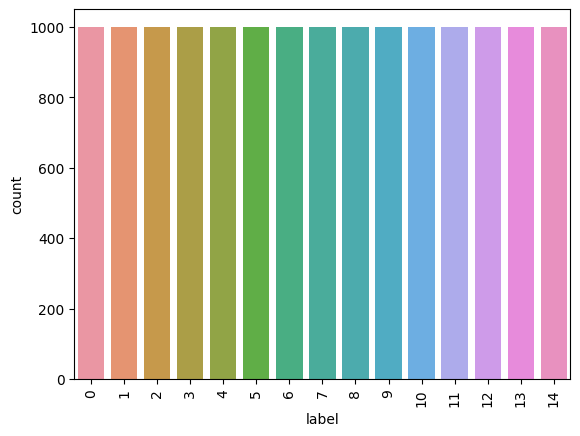

In [ ]:
X = chineseLetter.iloc[:,:-2]/225
y = chineseLetter['label']
y2 = chineseLetter['character']
print(X.shape)
print(y.shape)
#print(y)
print(chineseLetter.shape)
#making dictionary for the numbers
chineseNumberDict = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10, 100:11, 1000:12, 10000:13, 100000000:14}
#make histrogram
histogram = sb.countplot(x = 'label', data = chineseLetter)
histogram.set_xticklabels(chineseNumberDict.values(), rotation=90)
plt.show()

Visualize 25 random characters from the train dataset. Shows both the English number and the Chinese number as shown below.

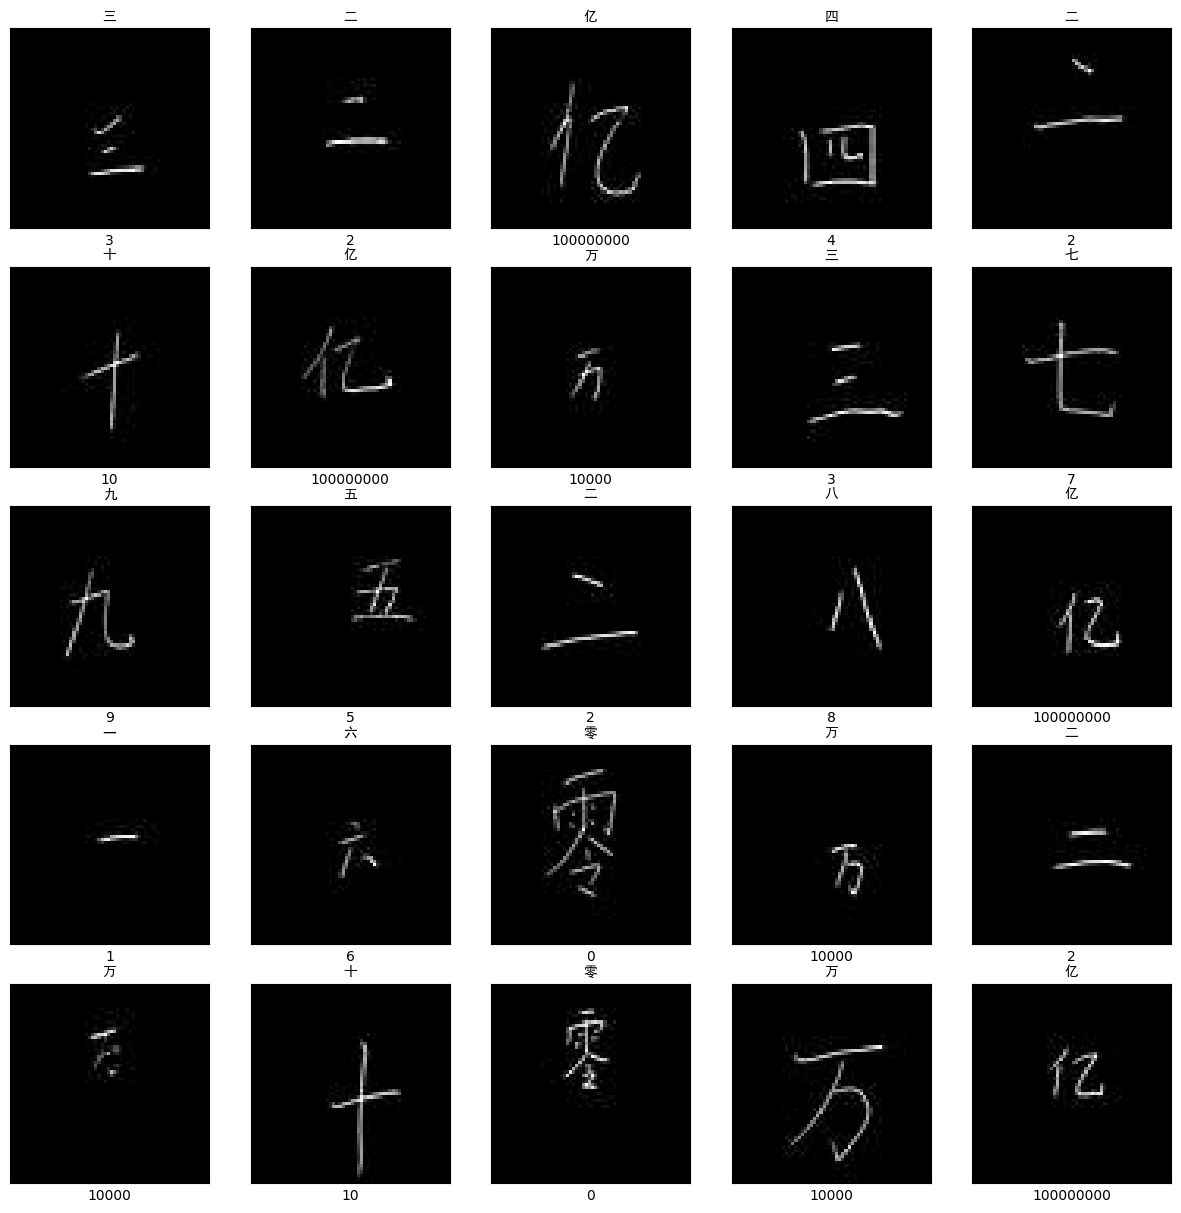

In [ ]:
plt.figure(figsize=(15, 15))

#for loop to go through 25 random images
for i in range(25):
    plt.subplot(5, 5, i+1)
    index = random.randint(1, len(chineseLetter))
    image = np.array(X.iloc[index])
    image = image.reshape(64,64)
    plt.imshow(image, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y[index])
    plt.title(y2[index], fontproperties = font_path)


Scale pixel values

In [ ]:
X = chineseLetter.iloc[:,:-2]/225
label = chineseLetter['label']
y = label.map(chineseNumberDict)
char=chineseLetter['character']
print(y)

0        9
1        9
2        9
3        9
4        9
        ..
14995    8
14996    8
14997    8
14998    8
14999    8
Name: label, Length: 15000, dtype: int64


Partition datasets into train and test, print the shapes of train and test dataset

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=2023, stratify=y)
print('Xtrain: ', Xtrain.shape)
print('ytrain: ', ytrain.shape)
print('Xtest: ', Xtest.shape)
print('ytest:', ytest.shape)

Xtrain = Xtrain.to_numpy()
Xtest = Xtest.to_numpy()

Xtrain = Xtrain.reshape(10500, 64, 64)
Xtest = Xtest.reshape(4500, 64, 64)

Xtrain:  (10500, 4096)
ytrain:  (10500,)
Xtest:  (4500, 4096)
ytest: (4500,)


Build a model of the NN using keras layers. The type, number and hyperparameters of layers is up to you

In [ ]:

model = Sequential()
#number of feature maps, weight, going however many pizels at a time, padding is adding extra pixels to make dimension same,
model.add(Conv2D(50, kernel_size = (2, 2), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (64,64,1)))
#pooling neurons together, taking fixed kernel size and choosing highest balue
model.add(MaxPool2D(pool_size=(2,2)))
#flattening neurons to be 1D
model.add(Flatten())
#dense layer is creating more fully connected layers
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(15, activation='softmax'))


Display the model summary.



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 50)        250       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 50)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 100)               5120100   
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 15)                765       
                                                        

Use the loss function sparse_categorical_crossentropy when compiling the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the model with at least 50 epochs

In [ ]:
history=model.fit(Xtrain, ytrain, batch_size=64, epochs=50, validation_data=(Xtest, ytest))

Epoch 1/50
165/165 [==============================] - 88s 533ms/step - loss: 6.4295e-05 - accuracy: 1.0000 - val_loss: 0.6621 - val_accuracy: 0.8984
Epoch 2/50
165/165 [==============================] - 52s 316ms/step - loss: 5.8381e-05 - accuracy: 1.0000 - val_loss: 0.6691 - val_accuracy: 0.8978
Epoch 3/50
165/165 [==============================] - 60s 367ms/step - loss: 5.2382e-05 - accuracy: 1.0000 - val_loss: 0.6773 - val_accuracy: 0.8967
Epoch 4/50
165/165 [==============================] - 50s 304ms/step - loss: 4.7520e-05 - accuracy: 1.0000 - val_loss: 0.6846 - val_accuracy: 0.8960
Epoch 5/50
165/165 [==============================] - 66s 396ms/step - loss: 4.3191e-05 - accuracy: 1.0000 - val_loss: 0.6871 - val_accuracy: 0.8982
Epoch 6/50
165/165 [==============================] - 54s 326ms/step - loss: 3.8687e-05 - accuracy: 1.0000 - val_loss: 0.6991 - val_accuracy: 0.8958
Epoch 7/50
165/165 [==============================] - 53s 323ms/step - loss: 3.5552e-05 - accuracy: 1.0000

Plot the loss and accuracy curves for both train and test partitions.

<ipython-input-11-225161a837d9>:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Training loss', 'Test loss')


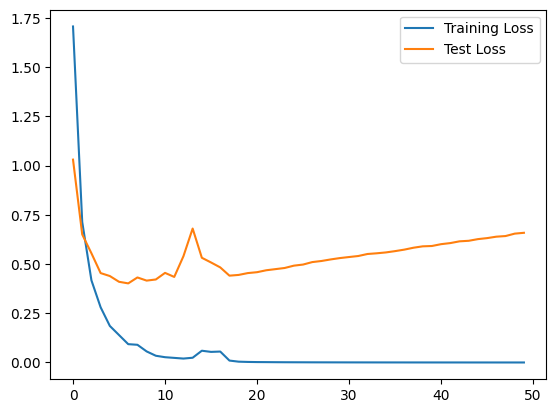

In [ ]:
#loss validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend('Training loss', 'Test loss')
plt.legend()

<ipython-input-12-728badf329dc>:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Training Accuracy', 'Test Accuracy')


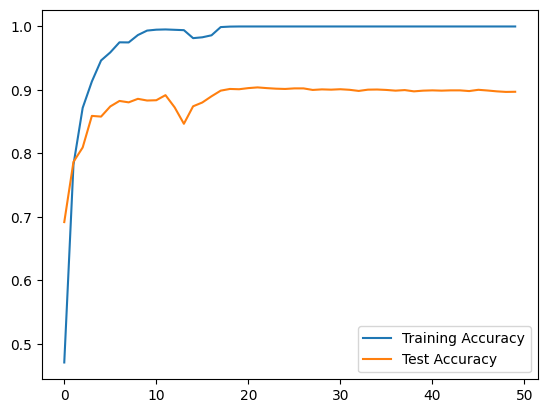

In [ ]:
#accuracy validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend('Training Accuracy', 'Test Accuracy')
plt.legend()

Print the confusion matrix.

141/141 [==============================] - 4s 29ms/step


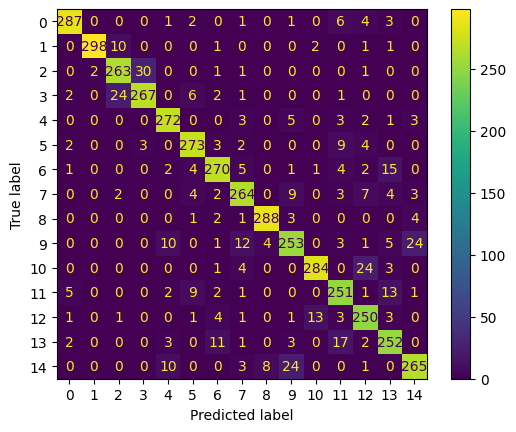

In [ ]:
ypred = np.argmax(model.predict(Xtest), axis=1)
cm = confusion_matrix(ypred, ytest)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=chineseNumberDict.values()).plot()

Visualize the predicted and actual image labels for the first 16 images in the dataset.

141/141 [==============================] - 6s 40ms/step


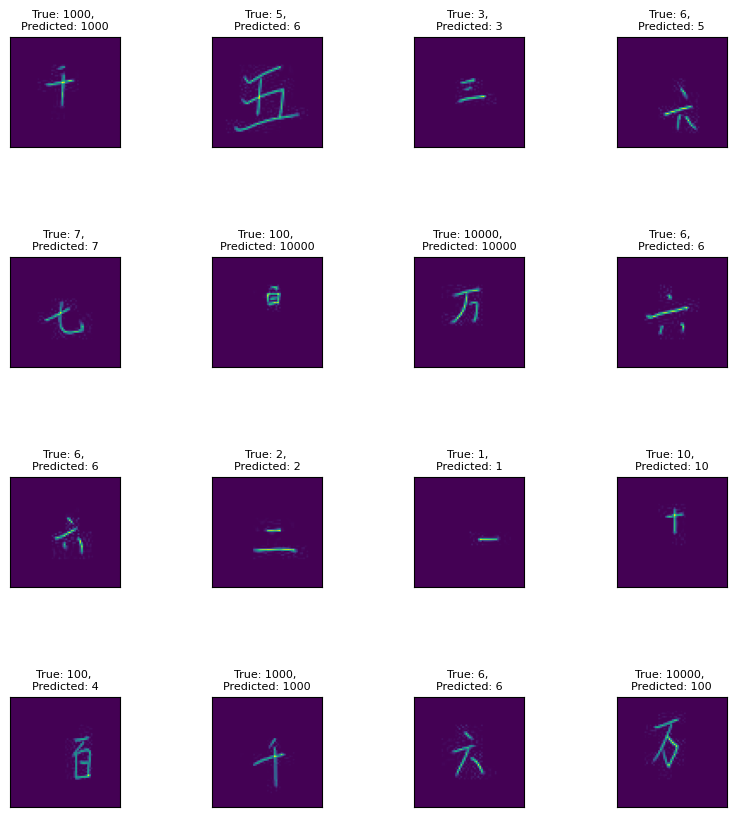

In [ ]:
reverse = dict((a,b) for b,a in chineseNumberDict.items())
y_pred = model.predict(Xtest)

#np.argmax returns index of maximum value in array
ypred=np.argmax(y_pred,axis=1)

plt.figure(figsize=[10,10])
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.array(Xtest[i]).reshape(64,64))
  plt.title('True: %s, \nPredicted: %s' %  (reverse[ytest.iloc[i]], reverse[ypred[i]]), fontsize=8)
  plt.subplots_adjust(hspace=1)

Visualize 1 random misclassified image. Display both the predicted and actual image labels. Also display the Chinese character as the X Label.

2391


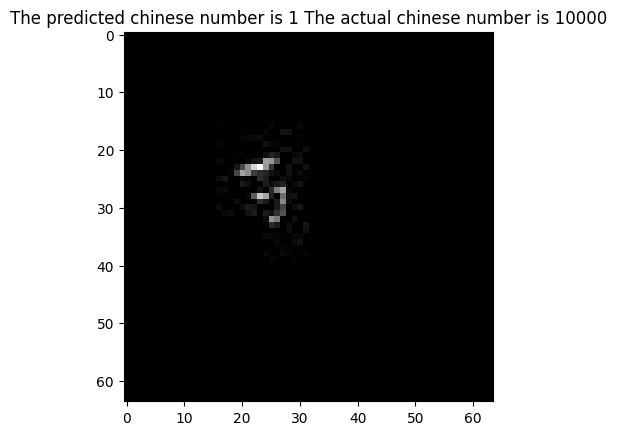

In [ ]:
#Convert the NumPy array 'failed_df' to a list of indices
failed_indices = np.where(ypred != ytest)[0].tolist()

# Sample a single index from the list of misclassified indices
failed_index = random.sample(failed_indices, 1)[0]
print(failed_index)

# Get the actual index from 'ytest'
required_id = ytest.index[failed_index]
failed_sample = np.array(Xtest[failed_index]).reshape(64, 64)
plt.imshow(failed_sample, cmap='gray')
plt.title('The predicted chinese number is ' + str(reverse[ypred[failed_index]]) + ' The actual chinese number is ' + str(reverse[ytest.iloc[failed_index]]))
plt.show()
